In [2]:
import json
import re
import os

# 🔹 텍스트 파일 경로 지정
file_path = r"D:\MINJI\NETWORK RELIABILITY\Data\pareto_results_summary2.json"

# 🔹 텍스트 파일에서 읽기
with open(file_path, "r", encoding="utf-8") as f:
    raw_text = f.read()

# 🔹 결과 저장 리스트
results = []

# 🔹 라인 단위로 파싱
lines = raw_text.strip().split('\n')

for line in lines:
    match = re.match(r"\s*(\d+)\s+([\d\.]+)\s+([\d\.]+)\s+\[([^\]]*)\]", line)
    if match:
        idx = int(match.group(1))
        pi = float(match.group(2))
        beta = float(match.group(3))
        components = [int(x.strip()) for x in match.group(4).split(',') if x.strip()]
        results.append({
            "index": idx,
            "pi": pi,
            "beta": beta,
            "failed_components": components
        })

# 🔹 동일한 경로에 저장
output_path = os.path.join(os.path.dirname(file_path), "pareto_results_summary2.json")

with open(output_path, "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2)

print(f"✅ 변환 완료: {len(results)}개의 Pareto 결과가 저장되었습니다.")
print(f"📁 저장 위치: {output_path}")


✅ 변환 완료: 0개의 Pareto 결과가 저장되었습니다.
📁 저장 위치: D:\MINJI\NETWORK RELIABILITY\Data\pareto_results_summary2.json


In [3]:
import json
from collections import Counter

# 🔹 파일 경로
file1_path = r"D:\MINJI\NETWORK RELIABILITY\Data\pareto_results_summary.json"
file2_path = r"D:\MINJI\NETWORK RELIABILITY\Data\pareto_results_summary2.json"

# 🔹 JSON 로드
with open(file1_path, "r", encoding="utf-8") as f1:
    data1 = json.load(f1)

with open(file2_path, "r", encoding="utf-8") as f2:
    data2 = json.load(f2)

# 🔹 각 failed_components를 정렬된 튜플로 변환하여 카운팅
def get_failed_comps_counter(data):
    return Counter(tuple(sorted(entry['failed_components'])) for entry in data)

counter1 = get_failed_comps_counter(data1)
counter2 = get_failed_comps_counter(data2)

# 🔹 전체 조합의 합집합
all_combinations = set(counter1.keys()).union(counter2.keys())

# 🔹 비교 결과
diffs = []

for comp in sorted(all_combinations):
    c1 = counter1.get(comp, 0)
    c2 = counter2.get(comp, 0)
    if c1 != c2:
        diffs.append({
            "failed_components": comp,
            "file1_count": c1,
            "file2_count": c2
        })

# 🔹 출력
if not diffs:
    print("✅ 두 파일의 failed_components 조합 및 개수가 동일합니다.")
else:
    print(f"⚠️ {len(diffs)}개의 failed_components 조합에서 차이 발생:\n")
    for d in diffs:
        print(f"🔸 {d['failed_components']} → file1: {d['file1_count']}, file2: {d['file2_count']}")


⚠️ 121개의 failed_components 조합에서 차이 발생:

🔸 (4, 5, 19, 23, 38, 39, 40, 43, 47, 49, 52, 71, 75, 79, 87, 91, 99, 100, 101, 107, 116, 125, 135, 149, 151, 153, 160) → file1: 2, file2: 0
🔸 (4, 5, 19, 23, 39, 47, 49, 52, 71, 75, 79, 87, 91, 100, 101, 107, 116, 125, 135, 149, 151, 153, 160) → file1: 2, file2: 0
🔸 (4, 5, 19, 23, 39, 47, 52, 71, 75, 79, 87, 91, 101, 107, 116, 125, 135, 149, 151, 153, 160) → file1: 2, file2: 0
🔸 (4, 19, 23, 30, 39, 47, 50, 61, 71, 75, 79, 85, 91, 115, 119, 125, 147, 149, 151, 153) → file1: 2, file2: 0
🔸 (5, 17, 19, 23, 27, 29, 33, 39, 47, 71, 75, 79, 91, 97, 119, 133, 135, 149, 151, 153) → file1: 2, file2: 0
🔸 (5, 17, 19, 23, 27, 29, 33, 39, 47, 71, 75, 79, 91, 97, 119, 135, 149, 151, 153) → file1: 2, file2: 0
🔸 (5, 17, 19, 23, 29, 33, 39, 47, 71, 75, 79, 91, 97, 119, 133, 135, 149, 151, 153) → file1: 2, file2: 0
🔸 (5, 17, 19, 23, 29, 33, 39, 47, 71, 75, 79, 91, 97, 119, 135, 149, 151, 153) → file1: 2, file2: 0
🔸 (5, 17, 19, 23, 29, 33, 39, 47, 71, 75, 79, 91, 119

In [4]:
import json

# 🔹 비교할 파일 경로
file2_path = r"D:\MINJI\NETWORK RELIABILITY\Data\pareto_results_summary2.json"

# 🔹 파일 읽기
with open(file2_path, "r", encoding="utf-8") as f:
    data2 = json.load(f)

# 🔹 모든 failed_components 조합을 정렬된 튜플로 수집 → set으로 중복 제거
combinations_file2 = {
    tuple(sorted(entry['failed_components'])) for entry in data2
}

# 🔹 조합의 길이 기준으로 정렬 (오름차순)
sorted_combos_by_length = sorted(combinations_file2, key=lambda x: len(x))

# 🔹 결과 출력
print(f"✅ 총 {len(sorted_combos_by_length)}개의 고유한 조합이 길이순으로 정렬되었습니다.\n")
for combo in sorted_combos_by_length:
    print(f"({len(combo)} comps) → {combo}")


✅ 총 0개의 고유한 조합이 길이순으로 정렬되었습니다.



In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import LineString
import pandas as pd
import time

start_time = time.time() 

# Define file paths
toy_node_path = r"D:\MINJI\NETWORK RELIABILITY\QGIS\Korea\KOREARL_NODE.shp"
toy_edge_path = r"D:\MINJI\NETWORK RELIABILITY\QGIS\Korea\KOREARL_EDGE.shp"

# Load the shapefiles
toy_node = gpd.read_file(toy_node_path)
toy_edge = gpd.read_file(toy_edge_path)

toy_node = toy_node.to_crs(epsg=3857)
toy_edge = toy_edge.to_crs(epsg=3857)

import networkx as nx

# 1. Node numbering (n1, n2, ...)
round_coord = lambda coord: (round(coord[0], 6), round(coord[1], 6))

# 1. node_id → geometry
node_info_list = [
    (row.node_id, round_coord((row.geometry.x, row.geometry.y)))
    for row in toy_node.itertuples()
]

nodes = {}
node_meta = []

for node_id, coord in node_info_list:
    node_name = f"n{int(node_id)}"  
    nodes[node_name] = coord
    node_meta.append({
        "node_id": int(node_id),
        "node_name": node_name,
        "geometry": coord
    })

# 좌표 → node_name 매핑
coord_to_node = {coord: node_name for node_name, coord in nodes.items()}



# 2. Edge numbering (e1, e2, ...)
nodeid_to_nodename = {meta["node_id"]: meta["node_name"] for meta in node_meta}
toy_edge['from_node_name'] = toy_edge['from_node_'].map(nodeid_to_nodename)
toy_edge['to_node_name'] = toy_edge['to_node_id'].map(nodeid_to_nodename)

edge_pairs = set()

for _, row in toy_edge.iterrows():
    from_node = row['from_node_name']
    to_node = row['to_node_name']
    sorted_pair = tuple(sorted([from_node, to_node]))
    edge_pairs.add(sorted_pair)

sorted_edge_pairs = sorted(edge_pairs, key=lambda x: (x[0], x[1]))

edges = {}
edge_number = 1

for from_node, to_node in sorted_edge_pairs:
    edges[f"e{edge_number}"] = (from_node, to_node)
    edges[f"e{edge_number + 1}"] = (to_node, from_node)
    edge_number += 2

edge_records = []
for edge_name, (from_node, to_node) in edges.items():
    match = toy_edge[((toy_edge['from_node_name'] == from_node) & (toy_edge['to_node_name'] == to_node)) |
                     ((toy_edge['from_node_name'] == to_node) & (toy_edge['to_node_name'] == from_node))]
    
    if not match.empty:
        journeys = match.iloc[0]['journeys']
        geometry = match.iloc[0]['geometry']
        edge_id = match.iloc[0]['edge_id']
    else:
        journeys = None
        geometry = None
        edge_id = None

    edge_records.append({
        'edge_id': edge_id,
        'edge_name': edge_name,
        'from_node_name': from_node,
        'to_node_name': to_node,
        'journeys': journeys,
        'geometry': geometry
    })

toy_edge_bidirectional = pd.DataFrame(edge_records)

toy_edge_bidirectional['edge_num'] = toy_edge_bidirectional['edge_name'].str.extract(r'e(\d+)').astype(int)
toy_edge_bidirectional = toy_edge_bidirectional.sort_values(by='edge_num').reset_index(drop=True)
toy_edge_bidirectional = toy_edge_bidirectional.drop(columns='edge_num')



# 3. Convert edges to arc format
arcs = [(u, v) for _, (u, v) in edges.items()]
#print("\nArcs:", arcs)



# 4. Compute Euclidean distances
def euclidean_distance(node1, node2):
    x1, y1 = nodes[node1]
    x2, y2 = nodes[node2]
    return round(((x2 - x1)**2 + (y2 - y1)**2)**0.5, 2)

arc_distance = {edge_name: euclidean_distance(u, v) for edge_name, (u, v) in edges.items()}
#print("Arc Distances:", arc_distance)



# 5. Create a network graph
# Create the graph using extracted data
G = nx.DiGraph()

# Add nodes and edges
for node, position in nodes.items():
    G.add_node(node, pos=position)

for edge_name, (u, v) in edges.items(): 
    G.add_edge(u, v, weight=arc_distance[edge_name])

# Remove duplicate edges
unique_edges = set()
edge_name_map = {}

for edge_name, (u, v) in edges.items():
    if (v, u) not in unique_edges:
        unique_edges.add((u, v))
        
        reverse_edge_name = [k for k, (a, b) in edges.items() if (a, b) == (v, u)]
        if reverse_edge_name:
            journeys = toy_edge_bidirectional[
                (toy_edge_bidirectional['from_node_name'] == u) &
                (toy_edge_bidirectional['to_node_name'] == v)
            ]['journeys'].values

            journeys_val = int(journeys[0]) if len(journeys) > 0 else "?"
            edge_label = f"{edge_name}, {reverse_edge_name[0]} ({journeys_val})"
        else:
            edge_label = edge_name

        edge_name_map[(u, v)] = edge_label

In [6]:
import sys
import os
import gc
import re
import json
import copy

# Scientific Libraries
import numpy as np
from scipy.stats import beta

# Optimization
from gurobipy import Model, GRB, quicksum

# Graph & Plotting\
import matplotlib
matplotlib.use("Agg")

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

# MBNpy Modules
#from mbnpy import brc, cpm, variable, operation, branch, config, trans

# Local Module
import batch

# Clean up memory
gc.collect()
%matplotlib inline


In [7]:
nodes = nodes  
edges = edges  
arcs = arcs
arc_distance = arc_distance 



# 1. Generate arc failure probabilities based on arc distances (longer distance -> higher failure probability)
# Get the minimum and maximum arc distances
min_dist = min(arc_distance.values())
max_dist = max(arc_distance.values())

# Failure probability range (0.01 ~ 0.3)
min_prob = 0.01
max_prob = 0.3

def compute_failure_probability(distance, min_dist, max_dist, min_prob, max_prob):
    normalized_dist = (distance - min_dist) / (max_dist - min_dist) # Normalize to [0,1]
    return round(min_prob + normalized_dist * (max_prob - min_prob), 4)

# Generate failure probability for each edge
probs_dynamic = {
    edge: {
        0: compute_failure_probability(dist, min_dist, max_dist, min_prob, max_prob),
        1: round(1 - compute_failure_probability(dist, min_dist, max_dist, min_prob, max_prob), 4)
    }
    for edge, dist in arc_distance.items()
}

# Sort edges by numeric order
def numeric_sort(edge):
    return int(edge[1:])  # Extract numeric part from "eX"

probs_sorted = {k: probs_dynamic[k] for k in sorted(probs_dynamic, key=numeric_sort)}

# Print formatted probabilities
#print(json.dumps(probs_sorted, indent=4, separators=(",", ": ")))
probs = probs_sorted
probs_cpm = copy.deepcopy(probs)
#print(probs_cpm)



# 2. Assign capacities to each arcs
# Initial intact capacity (Unchanged from original)
intact_capacity = {}

for edge_name, (u, v) in edges.items():
    match = toy_edge[((toy_edge['from_node_name'] == u) & (toy_edge['to_node_name'] == v)) |
                     ((toy_edge['from_node_name'] == v) & (toy_edge['to_node_name'] == u))]

    if not match.empty:
        intact_capacity[edge_name] = match.iloc[0]['journeys']
    else:
        intact_capacity[edge_name] = None  


# Function to generate random component states (0 or 1) based on failure probabilities
def generate_comps_st(probs):
    comps_st = {}

    for edge, prob in probs.items():
        if isinstance(prob, dict) and 0 in prob and 1 in prob:  # Ensure correct structure
            comps_st[edge] = np.random.choice([0, 1], p=[prob[0], prob[1]])
        else:
            print(f"Warning: Invalid probability format for edge {edge}: {prob}")  

    return comps_st

# Compute arc capacities
comps_st = generate_comps_st(probs_sorted)  



# 3. Compute maximum allowable distance
# Demand data
json_path = r"D:\MINJI\NETWORK RELIABILITY\QGIS\Korea\demand_data.json"
with open(json_path, "r", encoding="utf-8") as f:
    demand = json.load(f)

# Compute max allowable distance
avg_velo = 149  # Speed in km/h
max_distance = {}
commodity_name_map = {}  

for idx, item in enumerate(demand, start=1):
    origin = item["origin"]
    destination = item["destination"]
    commodity_key = f"{origin}->{destination}"
    commodity_name = f"k{idx}"  

    distance = item["distance"]
    max_allowable_time = (distance * 60) / avg_velo + 180
    max_distance[commodity_name] = max_allowable_time * avg_velo / 60

    commodity_name_map[commodity_name] = {
        "key": commodity_key,
        "origin": origin,
        "destination": destination
    }

# Build directed graph with weighted arcs
G = nx.DiGraph()
for node, position in nodes.items():
    G.add_node(node, pos=position)

for edge_id, (u, v) in edges.items():
    G.add_edge(u, v, weight=arc_distance[edge_id])

# Initialize demand for each arc
edge_demand = { (u, v): 0 for u, v in G.edges }

# Accumulate demand from all shortest paths
for info in demand:
    origin = info["origin_name"]         # use node name like 'n18'
    destination = info["destination_name"]
    amount = info["journeys"]            # amount is stored as 'journeys'

    try:
        paths = list(nx.all_shortest_paths(G, source=origin, target=destination, weight="weight"))
        for path in paths:
            for i in range(len(path) - 1):
                edge = (path[i], path[i + 1])
                if edge in edge_demand:
                    edge_demand[edge] += amount
    except nx.NetworkXNoPath:
        print(f"⚠️ No path found for {origin} → {destination}")
        continue

# Log-scaled normalization
normalized_demand = {
    (u, v): np.log10(d + 1) for (u, v), d in edge_demand.items()
}
D_max = max(normalized_demand.values())
D_min = min(normalized_demand.values())

normalized_demand = {
    (u, v): (val - D_min) / (D_max - D_min)
    for (u, v), val in normalized_demand.items()
}

In [8]:
# ✅ 개선 목표:
# (1) 양방향 엣지를 각각 독립적으로 취급
# (2) edges[(i, j)]와 edges[(j, i)]는 별도의 ID를 가짐
# (3) "(i, j) or (j, i)" 방식 제거, 방향성 보장

from gurobipy import Model, GRB, quicksum
import networkx as nx

def MCNF_systemfunc(arcs, comps_st, edges, arc_capacity, demand, max_distance, arc_distance):
    model = Model("MCNF")
    model.setParam('OutputFlag', 0)

    flow = {}
    unmet_demand = {}

    for k, info in demand.items():
        unmet_demand[k] = model.addVar(lb=0, vtype=GRB.CONTINUOUS, name=f"unsatisfied_{k}")
        for i, j in arcs:
            arc_key = next((e for e, v in edges.items() if v == (i, j)), None)  # ✅ 정방향만
            if arc_key is None:
                continue
            capacity = arc_capacity.get(arc_key, 0)
            flow[k, i, j] = model.addVar(lb=0, ub=capacity, vtype=GRB.CONTINUOUS, name=f"flow_{k}_{i}_{j}")

    model.setObjective(quicksum(unmet_demand[k] for k in demand), GRB.MINIMIZE)

    nodes = set(n for edge in edges.values() for n in edge)

    for k, info in demand.items():
        origin = info['origin']
        destination = info['destination']
        amount = info['amount']
        for node in nodes:
            inflow = quicksum(flow[k, i, j] for i, j in arcs if j == node and (k, i, j) in flow)
            outflow = quicksum(flow[k, i, j] for i, j in arcs if i == node and (k, i, j) in flow)
            if node == origin:
                model.addConstr(outflow - inflow == amount - unmet_demand[k])
            elif node == destination:
                model.addConstr(outflow - inflow == -amount + unmet_demand[k])
            else:
                model.addConstr(outflow - inflow == 0)

    for i, j in arcs:
        arc_key = next((e for e, v in edges.items() if v == (i, j)), None)
        if arc_key is None:
            continue
        model.addConstr(quicksum(flow[k, i, j] for k in demand if (k, i, j) in flow) <= arc_capacity[arc_key])

    for k, info in demand.items():
        origin = info['origin']
        total_flow = quicksum(flow[k, i, j] for i, j in arcs if (k, i, j) in flow and i == origin)
        distance_expr = quicksum(
            arc_distance[e] * flow[k, i, j]
            for e, (i, j) in edges.items() if (k, i, j) in flow
        )
        model.addConstr(distance_expr <= max_distance[k] * total_flow)

    model.optimize()

    if model.SolCount == 0:
        return None, None, None, None, None

    expected_loss = model.objVal
    total_demand = sum(info['amount'] for info in demand.values())
    expected_loss = min(max(expected_loss, 0.0), total_demand)

    edge_flows = {e: 0.0 for e in edges}
    min_comps_st = {}
    od_unmet_demand = {}
    od_used_edges = {k: set() for k in demand}

    for (k, i, j), var in flow.items():
        if var.X > 0:
            edge_id = next((e for e, v in edges.items() if v == (i, j)), None)
            if edge_id:
                edge_flows[edge_id] += var.X
                min_comps_st[edge_id] = 1
                od_used_edges[k].add(edge_id)

    for k in demand:
        od_unmet_demand[k] = unmet_demand[k].X

    sys_st = 's' if expected_loss < 89155 else 'f'
    if sys_st == 'f':
        min_comps_st = None

    return expected_loss, sys_st, min_comps_st, edge_flows, od_unmet_demand, od_used_edges


In [9]:
import networkx as nx
from networkx.algorithms.flow import shortest_augmenting_path

def shortestpath_systemfunc(arcs, comps_st, edges, arc_capacity, demand, max_distance, arc_distance):
    G = nx.DiGraph()

    # 🔹 방향 구분해서 arc 정보 반영
    for e, (i, j) in edges.items():
        if comps_st.get(e, 0) > 0:
            G.add_edge(i, j, capacity=arc_capacity.get(e, 1), weight=arc_distance.get(e, 1), link_id=e)

    expected_loss = 0.0
    used_links_set = set()
    edge_flows = {e: 0.0 for e in edges}
    od_unmet_demand = {}
    od_used_edges = {k: set() for k in demand}

    for k, info in demand.items():
        origin = info["origin"]
        destination = info["destination"]
        amount = info["amount"]
        max_dist = max_distance.get(k, float('inf'))
        unmet = 0.0

        if origin not in G.nodes or destination not in G.nodes:
            unmet = amount
        else:
            G_temp = G.copy()
            G_temp.add_edge(destination, 'sink', capacity=1)

            try:
                flow_value, _ = nx.maximum_flow(
                    G_temp, origin, 'sink', capacity='capacity', flow_func=shortest_augmenting_path
                )
            except Exception:
                flow_value = 0

            if flow_value == 0:
                unmet = amount
            else:
                try:
                    path = nx.shortest_path(G, source=origin, target=destination, weight='weight')
                    path_length = nx.shortest_path_length(G, source=origin, target=destination, weight='weight')

                    if path_length > max_dist:
                        unmet = amount
                    else:
                        for u, v in zip(path[:-1], path[1:]):
                            edge_id = G[u][v]['link_id']
                            used_links_set.add(edge_id)
                            od_used_edges[k].add(edge_id)
                            edge_flows[edge_id] += amount
                except nx.NetworkXNoPath:
                    unmet = amount

        expected_loss += unmet
        od_unmet_demand[k] = unmet

    total_demand = sum(info["amount"] for info in demand.values())
    expected_loss = max(0.0, min(expected_loss, total_demand))

    if expected_loss < 89155:
        sys_st = 's'
        min_comps_st = {e: 1 for e in used_links_set}
    else:
        sys_st = 'f'
        min_comps_st = None

    return expected_loss, sys_st, min_comps_st, edge_flows, od_unmet_demand, od_used_edges


In [13]:
demand_dict = {}
for idx, item in enumerate(demand, start=1):
    key = f"k{idx}"
    demand_dict[key] = {
        "origin": item["origin_name"],
        "destination": item["destination_name"],
        "amount": item["journeys"],
        "distance": item["distance"]
    }

comps_st = {edge: (0 if edge in ['e71'] else 1) for edge in intact_capacity}

arc_capacity = {edge: intact_capacity[edge] * comps_st[edge] for edge in intact_capacity}

loss, state, min_comps_st, edge_flows, od_unmet, od_used_edges = MCNF_systemfunc(
    arcs=arcs,
    comps_st=comps_st,
    edges=edges,
    arc_capacity=arc_capacity,
    demand=demand_dict,
    max_distance=max_distance,
    arc_distance=arc_distance
)

print("📌 OD별 unmet demand (with origin → destination):")
for k, ud in od_unmet.items():
    if ud > 0:
        origin = demand_dict[k]["origin"]
        destination = demand_dict[k]["destination"]
        print(f"🔸 {k}: {origin} → {destination}, unmet = {ud:.2f}")


import networkx as nx

# 1. comps_st 반영한 현재 상태 그래프 생성
G_active = nx.DiGraph()
for e, (u, v) in edges.items():
    if comps_st[e] == 1:  # 작동 중인 엣지만 반영
        dist = arc_distance[e]
        G_active.add_edge(u, v, weight=dist)

# 2. 엣지별 unmet 누적값 초기화
edge_unmet_impact = {e: 0.0 for e in edges}

# 3. OD별 shortest path 따라 unmet 누적
for k, ud in od_unmet.items():
    if ud > 0:
        origin = demand_dict[k]["origin"]
        destination = demand_dict[k]["destination"]

        try:
            path = nx.shortest_path(G_active, origin, destination, weight='weight')
            for i in range(len(path) - 1):
                u, v = path[i], path[i + 1]
                # 양방향 edges에서 정확한 edge 이름 찾기
                edge_name = next((e for e, (a, b) in edges.items() if (a, b) == (u, v)), None)
                if edge_name:
                    edge_unmet_impact[edge_name] += ud
        except nx.NetworkXNoPath:
            continue  # 경로가 없는 경우는 제외


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import contextily as ctx

from matplotlib.colors import LogNorm

def plot_unmet_edges(G, edge_unmet_impact, title="Edges Contributing to Unmet Demand"):
    flows = []

    print("\n📊 Edge unmet demand contribution:")
    for e, v in edge_unmet_impact.items():
        if v > 0:
            print(f"🔹 {e} ({edges[e][0]} → {edges[e][1]}): {v:.2f}")
            flows.append(v)

    if not flows:
        print("⚠️ No unmet demand to plot.")
        return

    vmin = min(flows)
    vmax = max(flows)
    # 🔸 LogNorm 사용: 작은 값도 시각적으로 강조
    norm = LogNorm(vmin=max(vmin, 1e-2), vmax=vmax)  # vmin=1e-2 이하일 경우 대비
    cmap = sns.color_palette("flare", as_cmap=True)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_facecolor('white')

    xs = [p[0] for p in pos.values()]
    ys = [p[1] for p in pos.values()]
    ax.set_xlim(min(xs), max(xs))
    ax.set_ylim(min(ys), max(ys))
    ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.Positron, alpha=0.7)

    nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1, ax=ax)

    for e, val in edge_unmet_impact.items():
        if val > 0:
            u, v = edges[e]
            color = cmap(norm(val))
            rad = 0.1 if (v, u) in edges.values() and u < v else -0.1
            lc = nx.draw_networkx_edges(
                G, pos,
                edgelist=[(u, v)],
                width=2.5,
                edge_color=[color],
                connectionstyle=f"arc3,rad={rad}",
                ax=ax
            )
            for line in lc: line.set_zorder(3)

    nx.draw_networkx_nodes(G, pos, node_color='black', node_size=30, ax=ax)

    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(flows)
    fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04).set_label("Unmet Demand Impact (Log Scale)")

    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# pos 정의
pos = {node_id: coords for node_id, coords in nodes.items()}  # EPSG:3857 좌표 dict

# G_unmet 정의 (현재 작동 중 네트워크 복사)
G_unmet = G_active.copy()

# 이후 plotting 함수 호출
plot_unmet_edges(G_unmet, edge_unmet_impact, "Edges Contributing to Unmet OD Flows")


📌 OD별 unmet demand (with origin → destination):

📊 Edge unmet demand contribution:
⚠️ No unmet demand to plot.


In [20]:
demand_dict = {}
for idx, item in enumerate(demand, start=1):
    key = f"k{idx}"
    demand_dict[key] = {
        "origin": item["origin_name"],
        "destination": item["destination_name"],
        "amount": item["journeys"],
        "distance": item["distance"]
    }

comps_st = {edge: (0 if edge in ['e71'] else 1) for edge in intact_capacity}

arc_capacity = {edge: intact_capacity[edge] * comps_st[edge] for edge in intact_capacity}

loss, state, min_comps_st, edge_flows, od_unmet, od_used_edges = MCNF_systemfunc(
    arcs=arcs,
    comps_st=comps_st,
    edges=edges,
    arc_capacity=arc_capacity,
    demand=demand_dict,
    max_distance=max_distance,
    arc_distance=arc_distance
)

print("📌 OD별 unmet demand (with origin → destination):")
for k, ud in od_unmet.items():
    if ud > 0:
        origin = demand_dict[k]["origin"]
        destination = demand_dict[k]["destination"]
        print(f"🔸 {k}: {origin} → {destination}, unmet = {ud:.2f}")


import networkx as nx

# 1. comps_st 반영한 현재 상태 그래프 생성
G_active = nx.DiGraph()
for e, (u, v) in edges.items():
    if comps_st[e] == 1:  # 작동 중인 엣지만 반영
        dist = arc_distance[e]
        G_active.add_edge(u, v, weight=dist)

# 2. 엣지별 unmet 누적값 초기화
edge_unmet_impact = {e: 0.0 for e in edges}

# 3. OD별 shortest path 따라 unmet 누적
for k, ud in od_unmet.items():
    if ud > 0:
        origin = demand_dict[k]["origin"]
        destination = demand_dict[k]["destination"]

        try:
            path = nx.shortest_path(G_active, origin, destination, weight='weight')
            for i in range(len(path) - 1):
                u, v = path[i], path[i + 1]
                # 양방향 edges에서 정확한 edge 이름 찾기
                edge_name = next((e for e, (a, b) in edges.items() if (a, b) == (u, v)), None)
                if edge_name:
                    edge_unmet_impact[edge_name] += ud
        except nx.NetworkXNoPath:
            continue  # 경로가 없는 경우는 제외


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import contextily as ctx

from matplotlib.colors import LogNorm

def plot_unmet_edges(G, edge_unmet_impact, title="Edges Contributing to Unmet Demand"):
    flows = []

    print("\n📊 Edge unmet demand contribution:")
    for e, v in edge_unmet_impact.items():
        if v > 0:
            print(f"🔹 {e} ({edges[e][0]} → {edges[e][1]}): {v:.2f}")
            flows.append(v)

    if not flows:
        print("⚠️ No unmet demand to plot.")
        return

    vmin = min(flows)
    vmax = max(flows)
    # 🔸 LogNorm 사용: 작은 값도 시각적으로 강조
    norm = LogNorm(vmin=max(vmin, 1e-2), vmax=vmax)  # vmin=1e-2 이하일 경우 대비
    cmap = sns.color_palette("flare", as_cmap=True)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_facecolor('white')

    xs = [p[0] for p in pos.values()]
    ys = [p[1] for p in pos.values()]
    ax.set_xlim(min(xs), max(xs))
    ax.set_ylim(min(ys), max(ys))
    ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.Positron, alpha=0.7)

    nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1, ax=ax)

    for e, val in edge_unmet_impact.items():
        if val > 0:
            u, v = edges[e]
            color = cmap(norm(val))
            rad = 0.1 if (v, u) in edges.values() and u < v else -0.1
            lc = nx.draw_networkx_edges(
                G, pos,
                edgelist=[(u, v)],
                width=2.5,
                edge_color=[color],
                connectionstyle=f"arc3,rad={rad}",
                ax=ax
            )
            for line in lc: line.set_zorder(3)

    nx.draw_networkx_nodes(G, pos, node_color='black', node_size=30, ax=ax)

    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(flows)
    fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04).set_label("Unmet Demand Impact (Log Scale)")

    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# pos 정의
pos = {node_id: coords for node_id, coords in nodes.items()}  # EPSG:3857 좌표 dict

# G_unmet 정의 (현재 작동 중 네트워크 복사)
G_unmet = G_active.copy()

# 이후 plotting 함수 호출
plot_unmet_edges(G_unmet, edge_unmet_impact, "Edges Contributing to Unmet OD Flows")


📌 OD별 unmet demand (with origin → destination):

📊 Edge unmet demand contribution:
⚠️ No unmet demand to plot.



🔹 Input Values:
Component States (comps_st): {'e1': 1, 'e2': 1, 'e3': 1, 'e4': 1, 'e5': 1, 'e6': 1, 'e7': 1, 'e8': 1, 'e9': 1, 'e10': 1, 'e11': 1, 'e12': 1, 'e13': 1, 'e14': 1, 'e15': 1, 'e16': 1, 'e17': 1, 'e18': 1, 'e19': 1, 'e20': 1, 'e21': 1, 'e22': 1, 'e23': 1, 'e24': 1, 'e25': 1, 'e26': 1, 'e27': 1, 'e28': 1, 'e29': 1, 'e30': 1, 'e31': 1, 'e32': 1, 'e33': 1, 'e34': 1, 'e35': 1, 'e36': 1, 'e37': 1, 'e38': 1, 'e39': 1, 'e40': 1, 'e41': 1, 'e42': 1, 'e43': 1, 'e44': 1, 'e45': 1, 'e46': 1, 'e47': 1, 'e48': 1, 'e49': 1, 'e50': 1, 'e51': 1, 'e52': 1, 'e53': 1, 'e54': 1, 'e55': 1, 'e56': 1, 'e57': 1, 'e58': 1, 'e59': 1, 'e60': 1, 'e61': 1, 'e62': 1, 'e63': 1, 'e64': 1, 'e65': 1, 'e66': 1, 'e67': 1, 'e68': 1, 'e69': 1, 'e70': 1, 'e71': 1, 'e72': 1, 'e73': 1, 'e74': 1, 'e75': 1, 'e76': 1, 'e77': 1, 'e78': 1, 'e79': 1, 'e80': 1, 'e81': 1, 'e82': 1, 'e83': 1, 'e84': 1, 'e85': 1, 'e86': 1, 'e87': 1, 'e88': 1, 'e89': 1, 'e90': 1, 'e91': 1, 'e92': 1, 'e93': 1, 'e94': 1, 'e95': 1, 'e96': 1, 'e

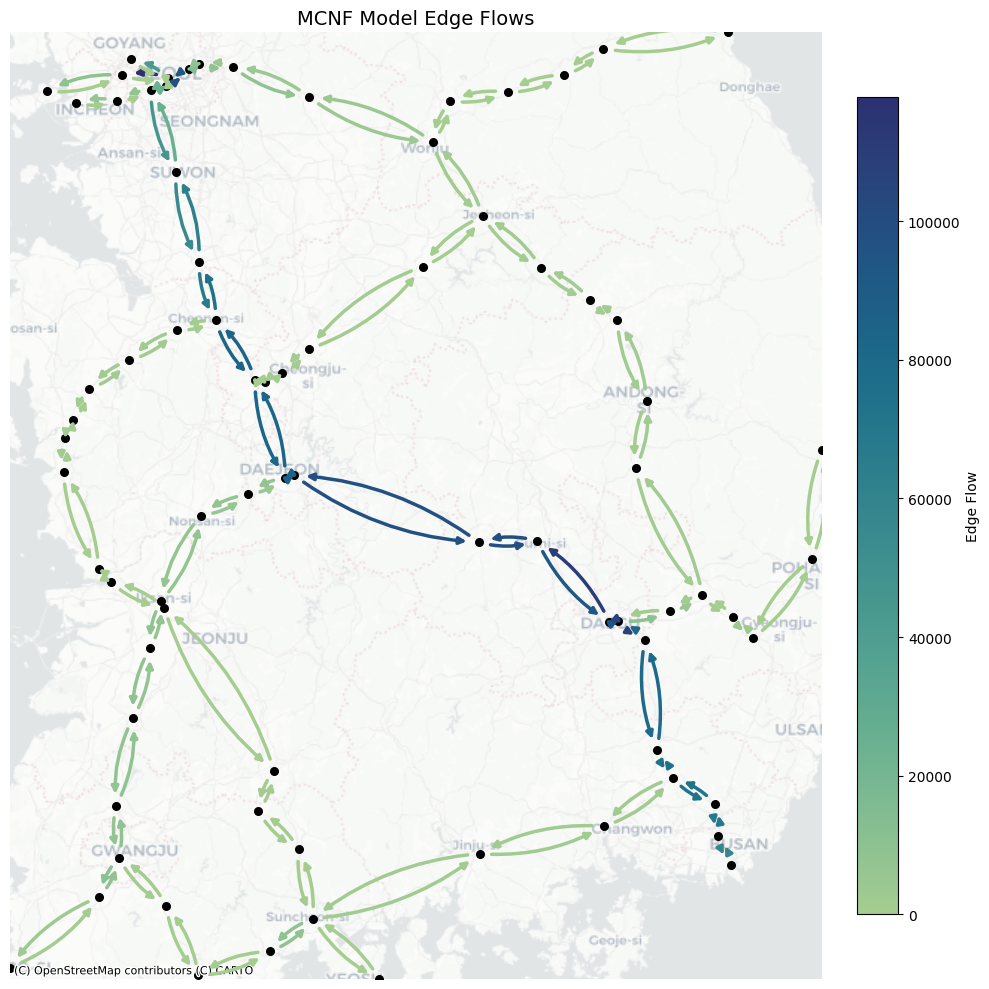

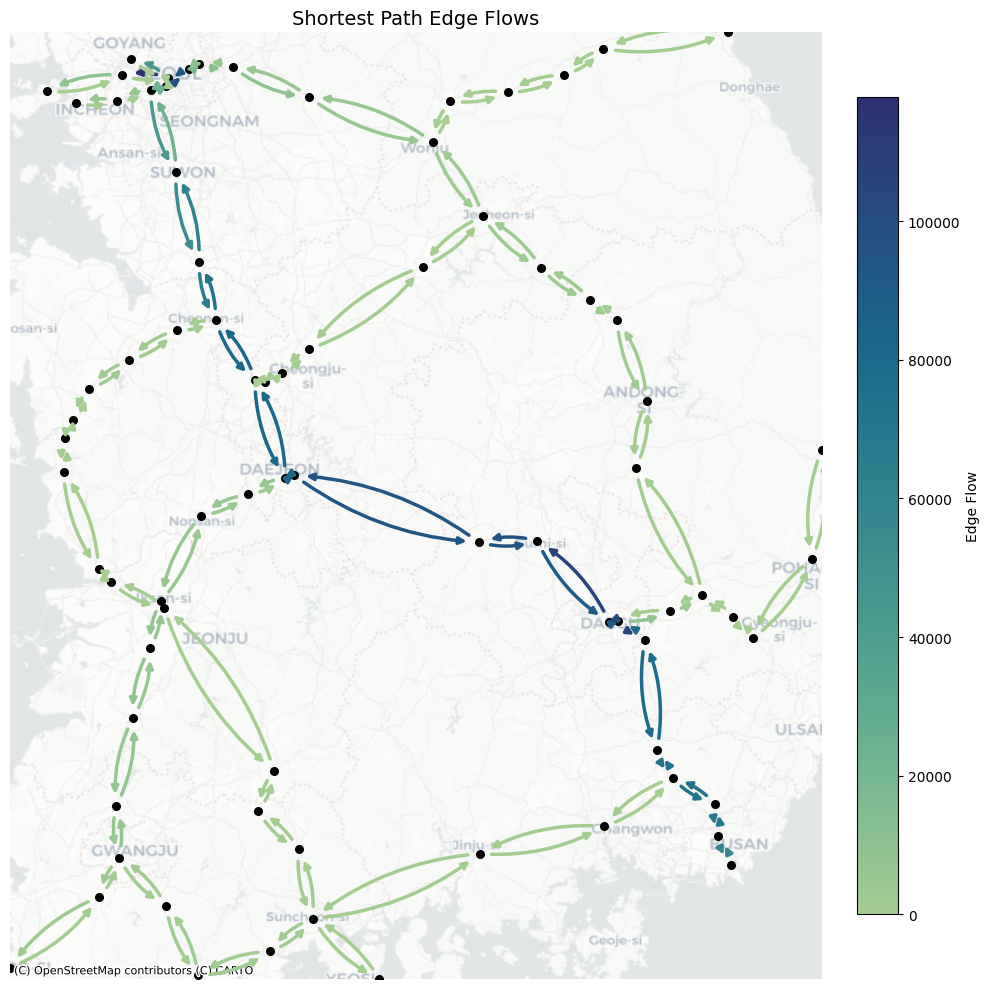

In [21]:
demand_dict = {}
for idx, item in enumerate(demand, start=1):
    key = f"k{idx}"
    demand_dict[key] = {
        "origin": item["origin_name"],
        "destination": item["destination_name"],
        "amount": item["journeys"],
        "distance": item["distance"]
    }

comps_st = {edge: (0 if edge in [] else 1) for edge in intact_capacity}
arc_capacity = {edge: intact_capacity[edge] * comps_st[edge] for edge in intact_capacity}

sys_fun_mcnf = lambda comps_st: MCNF_systemfunc(
    arcs=arcs,
    comps_st=comps_st,
    edges=edges,
    arc_capacity={e: intact_capacity[e] * comps_st[e] for e in comps_st},
    demand=demand_dict,
    max_distance=max_distance,
    arc_distance=arc_distance
)

sys_fun_shortest = lambda comps_st: shortestpath_systemfunc(
    arcs=arcs,
    comps_st=comps_st,
    edges=edges,
    arc_capacity={e: intact_capacity[e] * comps_st[e] for e in comps_st},
    demand=demand_dict,
    max_distance=max_distance,
    arc_distance=arc_distance
)

print("\n🔹 Input Values:")
print("Component States (comps_st):", comps_st)
print("Edges:", edges)
print("Arc Capacity:", arc_capacity)
print("Demand:", demand_dict)
print("Max Distance:", max_distance)
print("Arc Distance:", arc_distance)

# 실행 및 결과
expected_loss_mcnf, sys_st_mcnf, min_comps_st_mcnf, edge_flows_mcnf , od_unmet, od_used_edges= sys_fun_mcnf(comps_st)
expected_loss_shortest, sys_st_shortest, min_comps_st_shortest, edge_flows_shortest, od_unmet, od_used_edges= sys_fun_shortest(comps_st)

print("\n🔹 Output Values:")
print("System State (MCNF):", sys_st_mcnf)
print("System State (Shortest):", sys_st_shortest)
print("Minimum component state (MCNF):", min_comps_st_mcnf)
print("Minimum component state (Shortest):", min_comps_st_shortest)

# flows 출력
print("\n🔹 Edge Flows (MCNF):")
if edge_flows_mcnf is not None:
    for e, f in edge_flows_mcnf.items():
        if f > 0:
            print(f"{e}: {f:.2f}")
else:
    print("MCNF model did not return a valid flow solution.")

print("\n🔹 Edge Flows (Shortest):")
if edge_flows_shortest is not None:
    for e, f in edge_flows_shortest.items():
        if f > 0:
            print(f"{e}: {f:.2f}")
else:
    print("Shortest path function did not return a valid flow solution.")


# 2) networkx 그래프 생성
G_mcnf = nx.DiGraph()
G_sp   = nx.DiGraph()

for node, pos in nodes.items():
    G_mcnf.add_node(node, pos=pos)
    G_sp.add_node(node,   pos=pos)

pos_mcnf = nx.get_node_attributes(G_mcnf, "pos")
pos_sp   = nx.get_node_attributes(G_sp, "pos")

# nodes, edges 변수는 기존에 정의된 것을 그대로 사용
for node, pos in nodes.items():
    G_mcnf.add_node(node, pos=pos)
    G_sp.add_node(node,   pos=pos)

# flow > 0인 에지만 그래프에 추가
for edge_name, (u, v) in edges.items():
    flow_m = edge_flows_mcnf.get(edge_name, 0)
    flow_s = edge_flows_shortest.get(edge_name, 0)
    if flow_m >= 0:
        G_mcnf.add_edge(u, v, weight=flow_m)
    if flow_s >= 0:
        G_sp.add_edge(u, v, weight=flow_s)


pos = nodes  # EPSG:3857 좌표 dict


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import contextily as ctx
import networkx as nx

# 🔁 edges의 key를 정렬하여 2개씩 짝짓기
sorted_edge_keys = sorted(edges.keys(), key=lambda x: int(x[1:]))  # "e1", "e2" → 1, 2
edge_directions = {}

for i in range(0, len(sorted_edge_keys) - 1, 2):  # 2개씩
    e1 = sorted_edge_keys[i]
    e2 = sorted_edge_keys[i + 1]

    u1, v1 = edges[e1]
    u2, v2 = edges[e2]

    # 두 edge가 서로 반대방향일 때만 등록
    if (u1, v1) == (v2, u2):  # 양방향 확인
        edge_directions[(u1, v1)] =  0.15  # 곡률 +
        edge_directions[(u2, v2)] = 0.15  # 곡률 -
    else:
        print(f"⚠️ 경고: {e1}와 {e2}는 반대 방향이 아닙니다. 건너뜁니다.")


def plot_both_dirs(G, pos, edge_directions=None, title="Directed Edge Flow Plot"):
    edge_list = list(G.edges())
    flows = [G[u][v]['weight'] for u, v in edge_list if 'weight' in G[u][v]]
    if not flows:
        print("⚠️ No edges to plot.")
        return

    norm = mpl.colors.Normalize(vmin=min(flows), vmax=max(flows))
    cmap = sns.color_palette("crest", as_cmap=True)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('white')

    xs = [p[0] for p in pos.values()]
    ys = [p[1] for p in pos.values()]
    ax.set_xlim(min(xs), max(xs))
    ax.set_ylim(min(ys), max(ys))
    ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.Positron, alpha=0.7)

    for u, v in edge_list:
        if 'weight' not in G[u][v]:
            continue
        flow_val = G[u][v]['weight']
        color = cmap(norm(flow_val))

        # 🔄 사전 지정 곡률 적용
        rad = edge_directions.get((u, v), 0.0) if edge_directions else 0.0

        edge = nx.draw_networkx_edges(
            G, pos,
            edgelist=[(u, v)],
            width=2.5,
            edge_color=[color],
            connectionstyle=f"arc3,rad={rad}",
            arrows=True,
            ax=ax
        )
        for line in edge:
            line.set_zorder(3)

    nx.draw_networkx_nodes(G, pos, node_color='black', node_size=30, ax=ax)

    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array(flows)
    fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04).set_label("Edge Flow")

    ax.set_title(title, fontsize=14)
    ax.axis('off')
    plt.tight_layout()
    plt.show()


# 호출 예시
plot_both_dirs(G_mcnf, pos_mcnf, edge_directions=edge_directions, title="MCNF Model Edge Flows")
plot_both_dirs(G_sp, pos_sp, edge_directions=edge_directions, title="Shortest Path Edge Flows")


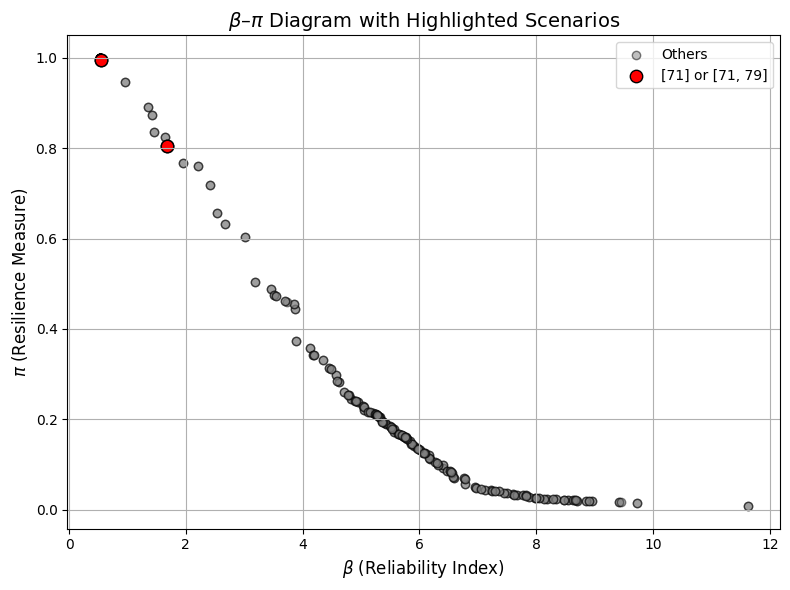

In [17]:
import re
import matplotlib.pyplot as plt

# 🔹 경로 설정
txt_path = r"D:\MINJI\NETWORK RELIABILITY\Meeting\pareto.txt"  # ⛳ 여기에 파일 경로 입력

# 🔹 데이터 파싱
pi_values = []
beta_values = []
highlight_flags = []  # True이면 [71] 또는 [71, 79] 조건 만족

with open(txt_path, 'r') as f:
    for line in f:
        match = re.match(r'\s*\d+\s+([\d.]+)\s+([\d.]+)\s+\[(.*?)\]', line)
        if match:
            pi = float(match.group(1))
            beta = float(match.group(2))
            failed_comps = list(map(int, match.group(3).split(', '))) if match.group(3).strip() else []
            
            pi_values.append(pi)
            beta_values.append(beta)

            # 🔸 [71] 또는 [71, 79]인지 확인
            highlight_flags.append(sorted(failed_comps) in [[71], [71, 79]])

# 🔹 색상 나누기
default_pi = [pi for pi, flag in zip(pi_values, highlight_flags) if not flag]
default_beta = [b for b, flag in zip(beta_values, highlight_flags) if not flag]
highlight_pi = [pi for pi, flag in zip(pi_values, highlight_flags) if flag]
highlight_beta = [b for b, flag in zip(beta_values, highlight_flags) if flag]

# 🔹 플로팅
plt.figure(figsize=(8, 6))
plt.scatter(default_beta, default_pi, c='gray', edgecolors='k', alpha=0.5, label='Others')
plt.scatter(highlight_beta, highlight_pi, c='red', edgecolors='k', s=80, label='[71] or [71, 79]')
plt.xlabel(r'$\beta$ (Reliability Index)', fontsize=12)
plt.ylabel(r'$\pi$ (Resilience Measure)', fontsize=12)
plt.title(r'$\beta$–$\pi$ Diagram with Highlighted Scenarios', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
